In [1]:
# imports

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/63e0jymqtpi9lgw/high_diamond_ranked_10min.csv?dl=1")

In [3]:
df.head(10)

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   
5  4475365709         1               18                   0               0   
6  4493010632         1               18                   3               1   
7  4496759358         0               16                   2               0   
8  4443048030         0               16                   3               0   
9  4509433346         1               13                   1               1   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   
5          5           3            6                  1            1  ...   
6          7           6            7                  1            1  ...   
7          5          13            3                  0            0  ...   
8          7           7            8                  0            0  ...   
9          4           5            5                  1            1  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   
5                   0         15201          7.0               18060   
6                   0         14463          6.4               15404   
7                   0         17920          6.6               16938   
8                   0         18380          7.2               19298   
9                   0         16605          6.8               18379   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   
5                    221                           59         -698   
6                    164                           35        -2411   
7                    157                           54         2615   
8                    240                           53         1979   
9                    247                           43         1548   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  
5               -101         22.1         1520.1  
6              -1563         16.4         1446.3  
7                800         15.7         1792.0  
8                771         24.0         1838.0  
9               1574         24.7         1660.5  

[10 rows x 40 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
df.shape

(9879, 40)

In [6]:
# checking if this is dirty data

df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [7]:
df['blueWins'].value_counts(normalize=True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

In [8]:
# removing the 'gameId' column due it to being useless in this situation

df.drop('gameId',axis=1)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               28                   2               1   
1            0               12                   1               0   
2            0               15                   0               0   
3            0               43                   1               0   
4            0               75                   4               0   
...        ...              ...                 ...             ...   
9874         1               17                   2               1   
9875         1               54                   0               0   
9876         0               23                   1               0   
9877         0               14                   4               1   
9878         1               18                   0               1   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0             9           6           11                  0            0   
1             5           5            5                  0            0   
2             7          11            4                  1            1   
3             4           5            5                  1            0   
4             6           6            6                  0            0   
...         ...         ...          ...                ...          ...   
9874          7           4            5                  1            1   
9875          6           4            8                  1            1   
9876          6           7            5                  0            0   
9877          2           3            3                  1            1   
9878          6           6            5                  0            0   

      blueHeralds  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0               0  ...                   0         16567          6.8   
1               0  ...                   1         17620          6.8   
2               0  ...                   0         17285          6.8   
3               1  ...                   0         16478          7.0   
4               0  ...                   0         17404          7.0   
...           ...  ...                 ...           ...          ...   
9874            0  ...                   0         15246          6.8   
9875            0  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            0  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                  17047                    197                           55   
1                  17438                    240                           52   
2                  17254                    203                           28   
3                  17961                    235                           47   
4                  18313                    225                           67   
...                  ...                    ...                          ...   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
0            -643                  8         19.7         1656.7  
1            2908               1173         24.0         1762.0  
2            1172               1033         20.3         1728.5  
3            1321                  7         23.5         1647.8  
4            1004               -230         22.5         1740.4  


In [9]:
y_true = df['blueWins']

In [10]:
train = df
test = df.drop('blueWins',axis=1)

In [11]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=df['blueWins'], random_state=42)

In [12]:
target = 'blueWins'

In [13]:
train_features = train.drop(columns=[target])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
features = numeric_features

In [14]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [15]:
%%time
pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_jobs=1,
        random_state=42,
        max_depth=18,
        min_samples_split=6,
        n_estimators=999
    )
)
pipeline.fit(X_train,y_train)

Wall time: 23.7 s


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=18, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=6,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=999, n_jobs=1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

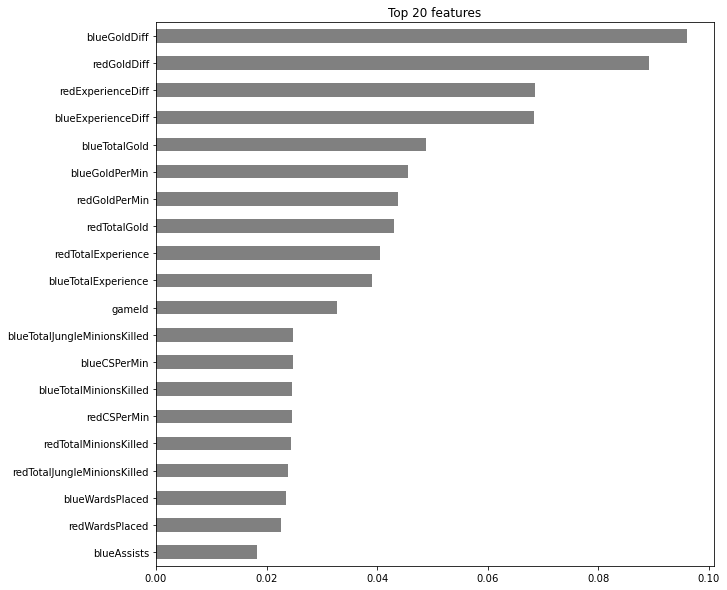

In [16]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [19]:
print('training accuracy:', pipeline.score(X_train, y_train))
print('validation accuracy:', pipeline.score(X_val, y_val))

training accuracy: 0.9901303302543338
validation accuracy: 0.7171052631578947


In [20]:
y_pred = pipeline.predict(X_test)

In [21]:
print('Accuracy Score:',accuracy_score(y_true, y_pred))

Accuracy Score: 0.9355197894523737


In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
print('training accuracy:', model.score(X_train, y_train))
print('validation accuracy:', model.score(X_val, y_val))

training accuracy: 1.0
validation accuracy: 0.7176113360323887


In [25]:
y_pred = model.predict(X_test)

In [26]:
print('Accuracy Score:',accuracy_score(y_true, y_pred))

Accuracy Score: 0.9435165502581233


In [27]:
from xgboost.sklearn import XGBClassifier
model2 = make_pipeline(
    SelectKBest(k=20),
    XGBClassifier(
    n_estimators=20,
    max_depth=12,
    learning_rate=.5,
    n_jobs=-1
    )
) 

model2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x000001A8C4092B88>)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.5,
                               max_delta_step=0, max_depth=12,
                               min_child_weight=1, missing=None,
                               n_estimators=20, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [28]:
print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))

training accuracy: 0.9930406174870302
validation accuracy: 0.7004048582995951


In [29]:
y_pred = model2.predict(X_test)

In [30]:
print('Accuracy Score:',accuracy_score(y_true, y_pred))

Accuracy Score: 0.9345075412491143


In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('standardscaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(bootstrap=True,
                                                                        ccp_alpha=0.0,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                        max_depth=18,
                                                                        max_features='auto'

In [32]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

In [33]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [34]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

In [35]:
permuter = PermutationImportance(
    model2,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('selectkbest',
                                                 SelectKBest(k=20,
                                                             score_func=<function f_classif at 0x000001A8C4092B88>)),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=0.5,
                                                               booster='gbtree',
                                                               colsample_bylevel=1,
                                                               colsample_bynode=1,
                                                               colsample_bytree=1,
                                                               gamma=0,
                                                               learning_rate=0.5,
                                

In [36]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

In [37]:
fig = px.scatter(df, 
                 x='blueKills',
                 y='redKills', 
                 title="Blue Team's Kills vs Red Team's Kills")
fig.show()

In [65]:
fig1 = px.scatter(df,
              x='redGoldDiff', 
              y='blueTotalGold',
              title="Blue Team's Total Gold vs Blue Team's Gold Difference")
fig1.show()

In [60]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'blueTotalGold'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

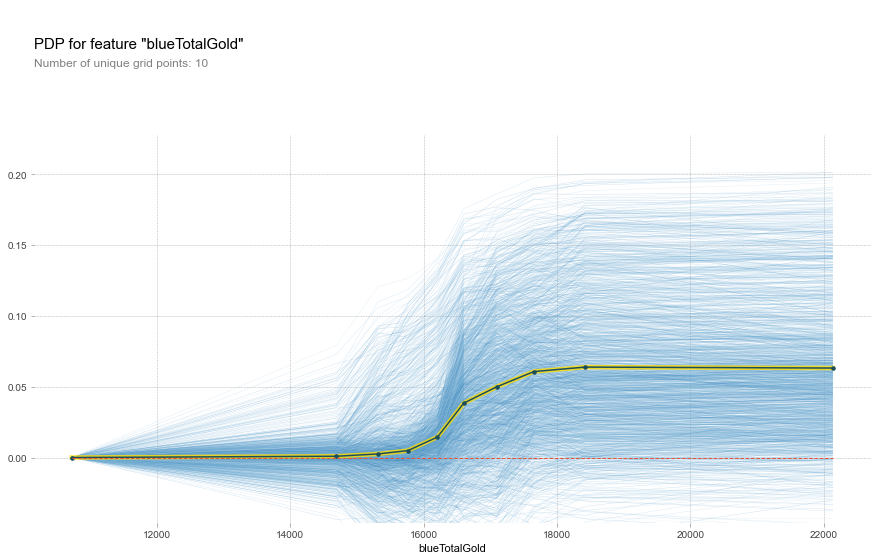

In [61]:
pdp_plot(isolated, feature_name=feature, plot_lines=True);

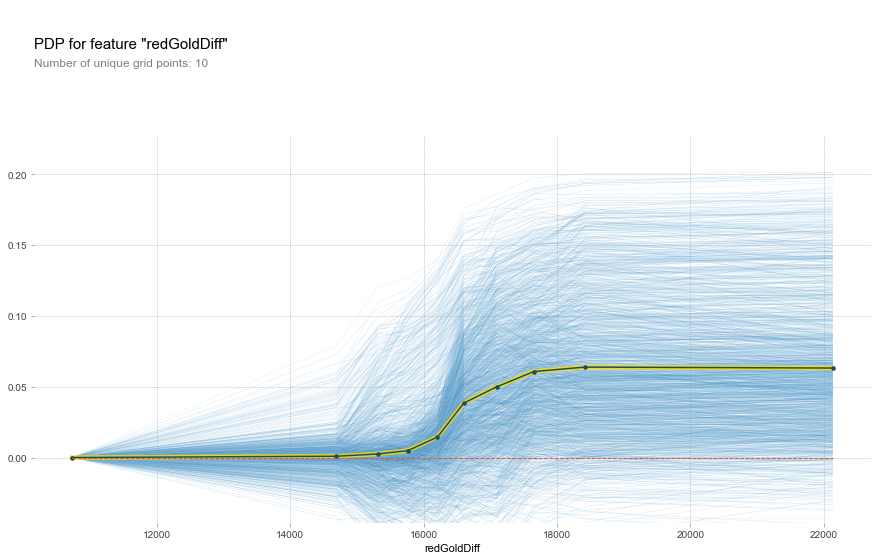

In [62]:
feature = 'redGoldDiff'
pdp_plot(isolated, feature_name=feature, plot_lines=True);

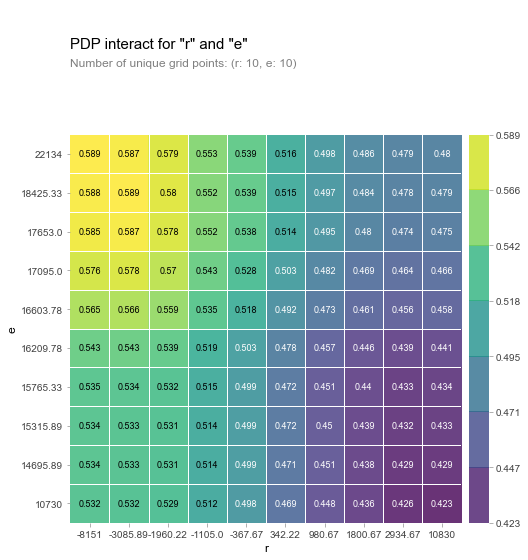

In [66]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['redGoldDiff', 'blueTotalGold']

interaction = pdp_interact(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature);

In [45]:
features = ['blueGoldDiff', 'blueTotalGold', 'redExperienceDiff', 'blueCSPerMin']
X_train = train[features]
X_test = test[features]

In [47]:
from scipy.stats import randint, uniform

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=7, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

In [48]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 5, 'max_features': 0.9977404850489419, 'n_estimators': 236}
Cross-validation MAE 0.36091405123407905


In [49]:
row = X_test.iloc[[0]]
row

blueGoldDiff  blueTotalGold  redExperienceDiff  blueCSPerMin
0           643          17210                  8          19.5

In [50]:
model.predict(row)

array([0.56402445])

In [51]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)